# Datasets:
### Arthropod Taxonomy Orders Object Detection Dataset:
[Arthropod Taxonomy](https://www.kaggle.com/mistag/arthropod-taxonomy-orders-object-detection-dataset)

check this out:
https://www.kaggle.com/moltean/fruits

In [8]:
import pandas as pd 
import glob

In [27]:
dir = '/groups/jjrodrig/projects/datasets/taxonomy_aim1_1/arthropod_taxonomy/ArTaxOr/Araneae/annotations'
pfiles=glob.glob(f'{dir}/*', recursive=True)
# pfiles=glob.glob('/kaggle/input/ArTaxOr/**/*.vott', recursive=True)
# pfiles 

In [24]:
cnt = 0
for ix, x in enumerate(pfiles):
    if 'jpg' not in x:
        cnt += 1
        print(ix,x)

print(cnt)

2354 /groups/jjrodrig/projects/datasets/taxonomy_aim1_1/arthropod_taxonomy/ArTaxOr/Araneae/annotations
1


# 1. Invertebrate animal (arthropod) taxonomy

[Arthropod Taxonomy](https://www.kaggle.com/mistag/arthropod-taxonomy-orders-object-detection-dataset)


Species identification from an image is a complex problem. Image classification assumes there is only one species in the image. But generally we want to identify ALL species present in an image. Thankfully, biologists and taxonomists have systematically classified and ordered organisms in a taxonomic hierarchy. The ArTaxOr data set covers arthropods, which includes insects, spiders, crustaceans, centipedes, millipedes etc. There are more than 1.3 million species of arthropods described. Creating a single dataset to cover all those is not feasible. However, the identification problem can be broken down into multiple tasks, starting with object detection at order level (there are >120 orders of arthropods), then followed by family classification and finally species classification, as illustrated below:

Notice though, many species (maybe most) cannot be identified to species level from a photo only, but requires study of microscopic details not visible in a photo. But identifying arthropods down to family level at least can be very useful.

Test: Which of the photos below show a butterfly or moth (order Lepidoptera)? See answer at the bottom.

## Content

The dataset consists of images of arthropods in jpeg format and object boundary boxes in json format. There are between one and 50 objects per image.

This dataset is actively maintained, and new orders will be added on a regular basis. Currently, the following orders are covered with at least 2000 objects per order:

- Araneae (spiders), adults, juveniles
- Coleoptera (beetles), adults
- Diptera (true flies, including mosquitoes, midges, crane file etc.), adults
- Hemiptera (true bugs, including aphids, cicadas, planthoppers, shield bugs etc.), adults and nymphs
- Hymenoptera (ants, bees, wasps), adults
- Lepidoptera (butterflies, moths), adults
- Odonata (dragonflies, damselflies), adults

## Acknowledgements

Images are collected from various sources, including inaturalist.org and similar. Every image is originally published under a Creative Commons license. In this dataset the photographer and/or source is embedded in the EXIF tags. Images are otherwise unmodified.

In [1]:
import glob
import pandas as pd
import json

In [2]:
dir= '/groups/jjrodrig/projects/datasets/taxonomy_aim1_1/arthropod_taxonomy/ArTaxOr/'
pfiles=glob.glob(f'{dir}/**/*.vott', recursive=True)

pfiles

['/groups/jjrodrig/projects/datasets/taxonomy_aim1_1/arthropod_taxonomy/ArTaxOr/Hymenoptera/annotations/Hymenoptera.vott',
 '/groups/jjrodrig/projects/datasets/taxonomy_aim1_1/arthropod_taxonomy/ArTaxOr/Hemiptera/annotations/Hemiptera.vott',
 '/groups/jjrodrig/projects/datasets/taxonomy_aim1_1/arthropod_taxonomy/ArTaxOr/Coleoptera/annotations/Coleoptera.vott',
 '/groups/jjrodrig/projects/datasets/taxonomy_aim1_1/arthropod_taxonomy/ArTaxOr/Lepidoptera/annotations/Lepidoptera.vott',
 '/groups/jjrodrig/projects/datasets/taxonomy_aim1_1/arthropod_taxonomy/ArTaxOr/Diptera/annotations/Diptera.vott',
 '/groups/jjrodrig/projects/datasets/taxonomy_aim1_1/arthropod_taxonomy/ArTaxOr/Araneae/annotations/Araneae.vott']

In [3]:
# df = pd.read_json(pfiles[0])

with open(pfiles[0]) as file:
    df = json.load(file)

In [23]:
print('name', df['name'])
print('securityToken', df['securityToken'])

print('keys',df.keys())



name Hymenoptera
securityToken Diptera Token
keys dict_keys(['name', 'securityToken', 'sourceConnection', 'targetConnection', 'videoSettings', 'tags', 'id', 'activeLearningSettings', 'exportFormat', 'version', 'lastVisitedAssetId', 'assets'])


In [54]:
df=pd.DataFrame()

for f in pfiles:
    with open(f) as file:

        pdata=json.load(file)
        df=df.append(pd.DataFrame(list(pdata['assets'].values())), ignore_index=True)

df['path'] = df['path'].str.replace('file:F:/ArTaxOr/',dir)

df.head()

,format,id,name,path,size,state,type
0,jpg,18d6e4cfba5f7c11896155843770f541,000167b01850.jpg,/groups/jjrodrig/projects/datasets/taxonomy_ai...,"{'width': 2048, 'height': 1365}",2,1
1,jpg,d27c1ee10db64d7cefe6790d25336315,001aff3bb822.jpg,/groups/jjrodrig/projects/datasets/taxonomy_ai...,"{'width': 1257, 'height': 1257}",2,1
2,jpg,f0dc799b8a02ea34badcb02c441ca552,00747883359c.jpg,/groups/jjrodrig/projects/datasets/taxonomy_ai...,"{'width': 1493, 'height': 1494}",2,1
3,jpg,a08e2be7c5adcdb9fe4af4b61da822c7,007a168b796e.jpg,/groups/jjrodrig/projects/datasets/taxonomy_ai...,"{'width': 2048, 'height': 1365}",2,1
4,jpg,562dd197a889d9bb5e735e156c17e323,01062c5763da.jpg,/groups/jjrodrig/projects/datasets/taxonomy_ai...,"{'width': 1954, 'height': 1954}",2,1


##  Extract the labels for later use:



In [57]:
tags=pd.DataFrame(list(pdata['tags']))
pattern=r'[A-Z]'
labels=tags[tags.name.str.match(pattern)]
labels

,name,color
0,Lepidoptera,#5db300
1,Coleoptera,#e81123
2,Hymenoptera,#6917aa
3,Diptera,#015cda
4,Araneae,#4894fe
5,Hemiptera,#257ffe
6,Odonata,#257ffe


## Image resolution

Plot the distribution of image size - there is a peak around 3Mpix.


/home/u29/mohammadsmajdi/anaconda3/envs/tf2_4/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


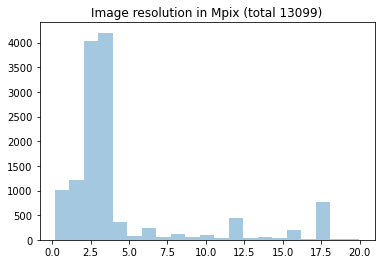

In [60]:
import seaborn as sns
import numpy as np 

ps=np.zeros(len(df))
for i in range(len(df)):

    ps[i]=df['size'][i]['width'] * df['size'][i]['height']/1e6
sns.distplot(ps, bins=21,kde=False).set_title('Image resolution in Mpix (total {})'.format(len(df)))

## Object data import

We will now import all the object data from the json files into a dataframe. In the process, we convert object positions to relative values. This step might take some time.


## 1. Biodiversity in National Parks
Plant and animal species found in the American national park system

### Context

The National Park Service publishes a database of animal and plant species identified in individual national parks and verified by evidence — observations, vouchers, or reports that document the presence of a species in a park. All park species records are available to the public on the National Park Species portal; exceptions are made for sensitive, threatened, or endangered species when widespread distribution of information could pose a risk to the species in the park.

### Content

National Park species lists provide information on the presence and status of species in our national parks. These species lists are works in progress and the absence of a species from a list does not necessarily mean the species is absent from a park. The time and effort spent on species inventories varies from park to park, which may result in data gaps. Species taxonomy changes over time and reflects regional variations or preferences; therefore, records may be listed under a different species name.

Each park species record includes a species ID, park name, taxonomic information, scientific name, one or more common names, record status, occurrence (verification of species presence in park), nativeness (species native or foreign to park), abundance (presence and visibility of species in park), seasonality (season and nature of presence in park), and conservation status (species classification according to US Fish & Wildlife Service). Taxonomic classes have been translated from Latin to English for species categorization; order, family, and scientific name (genus, species, subspecies) are in Latin.

### Acknowledgements

The National Park Service species list database is managed and updated by staff at individual national parks and the systemwide Inventory and Monitoring department.

- Source: https://irma.nps.gov/NPSpecies
- kaggle: https://www.kaggle.com/nationalparkservice/park-biodiversity?select=species.csv

Users interested in getting this data via web services, please go to: http://irmaservices.nps.gov

In [4]:

dir= '/groups/jjrodrig/projects/datasets'
data = {}
data['parks']   = pd.read_csv(f'{dir}/park-biodiversity/parks.csv' )
data['species'] = pd.read_csv(f'{dir}/park-biodiversity/species.csv' )

/home/u29/mohammadsmajdi/anaconda3/envs/tf2_4/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
data ['species'].head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


## 2. Microbe Taxonomy
kaggle: https://www.kaggle.com/indronil2489/abccccc

In [7]:
dir= '/groups/jjrodrig/projects/datasets'

data = pd.read_csv(f'{dir}/microb_taxonomy/Manitou10_microbe_taxonomy.csv')
data 

,superkingdom:Bacteria,phylum:Proteobacteria,class:Betaproteobacteria,order:Nitrosomonadales,family:Nitrosomonadaceae,genus:Nitrosospira,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,superkingdom:Viruses,ssRNA viruses,ssRNA positive-strand viruses,no DNA stage,family:Luteoviridae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,superkingdom:Bacteria,phylum:Cyanobacteria,order:Nostocales,family:Scytonemataceae,genus:Scytonema,species:Scytonema tolypothrichoides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,superkingdom:Bacteria,phylum:Chloroflexi,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,superkingdom:Bacteria,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,superkingdom:Bacteria,phylum:Proteobacteria,class:Gammaproteobacteria,order:Enterobacteriales,family:Enterobacteriaceae,genus:Buchnera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,superkingdom:Bacteria,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,superkingdom:Bacteria,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,superkingdom:Bacteria,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,superkingdom:Bacteria,phylum:Cyanobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
